In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import fbprophet
import requests
import datetime

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

plt.style.use('ggplot')
# matplotlib.rcParams['axes.labelsize'] = 14
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['text.color'] = 'k'

In [3]:
vaccine_data = pd.read_csv('https://raw.githubusercontent.com/youyanggu/covid19-cdc-vaccination-data/main/aggregated.csv')
CA_data = vaccine_data[vaccine_data['LongName'] == 'California']
CA_data['percent'] = CA_data['Doses_Administered'] / CA_data['Census2019']
USA_data = vaccine_data[vaccine_data['LongName'] == 'United States']

In [4]:
cleaned_ca_vacc_df = CA_data.rename(columns = {'Date': 'ds', 'percent': 'y'})
cleaned_ca_vacc_df = cleaned_ca_vacc_df[['ds','y']]
ca_vacc_prophet = fbprophet.Prophet()
ca_vacc_prophet.fit(cleaned_ca_vacc_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
# Make a future dataframe for 4 years from now
ca_vacc_forecast = ca_vacc_prophet.make_future_dataframe(periods = 30 * 4, freq = 'D')
ca_vacc_forecast_preds = ca_vacc_prophet.predict(ca_vacc_forecast)

In [6]:
cleaned_usa_vacc_df = USA_data.rename(columns = {'Date': 'ds', 'Doses_Administered': 'y'})
cleaned_usa_vacc_df = cleaned_usa_vacc_df[['ds','y']]
usa_vacc_prophet = fbprophet.Prophet()
usa_vacc_prophet.fit(cleaned_usa_vacc_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [7]:
# Make a future dataframe for 4 years from now
usa_vacc_forecast = usa_vacc_prophet.make_future_dataframe(periods = 30 * 4, freq = 'D')
usa_vacc_forecast_preds = usa_vacc_prophet.predict(usa_vacc_forecast)

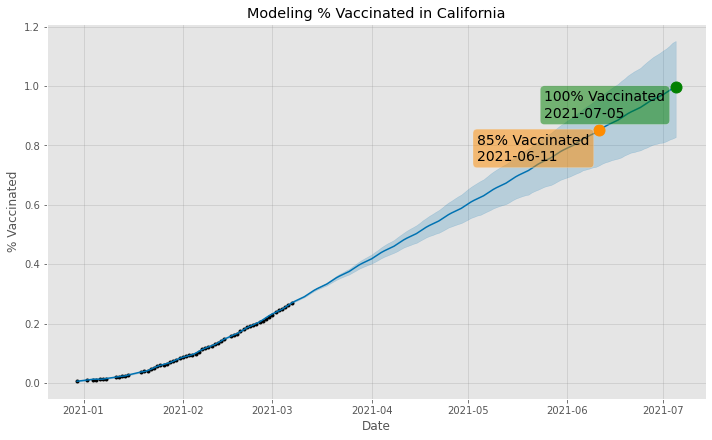

In [284]:
ca_vacc_prophet.plot(ca_vacc_forecast_preds, xlabel = 'Date', ylabel = '% Vaccinated')
plt.title('Modeling % Vaccinated in California');

props1 = dict(boxstyle='round', facecolor='darkorange', alpha=0.5)
textstr1 = '\n'.join((
    r'85% Vaccinated',
    r'2021-06-11'))
plt.text(datetime.datetime(2021, 5, 4, 0, 0), 0.841038, textstr1, fontsize=14, verticalalignment='top', bbox=props1)

props2 = dict(boxstyle='round', facecolor='green', alpha=0.5)
textstr2 = '\n'.join((
    r'100% Vaccinated',
    r'2021-07-05'))
plt.text(datetime.datetime(2021, 5, 25, 0, 0), 0.986790, textstr2, fontsize=14, verticalalignment='top', bbox=props2)

plt.plot(datetime.datetime(2021, 6, 11, 0, 0), 	0.851038, marker = 'o', markersize = 11, color = 'darkorange');
plt.plot(datetime.datetime(2021, 7, 5, 0, 0), 	0.996790, marker = 'o', markersize = 11, color = 'green');
# plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc = 'upper left', prop = {'size': 12});

In [14]:
usa_vacc_forecast_preds[usa_vacc_forecast_preds['ds'] == datetime.datetime(2021, 4, 29, 0, 0)]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
116,2021-04-29,1.936808e+08,1.719378e+08,2.143729e+08,1.723847e+08,2.149382e+08,-493744.766861,-493744.766861,-493744.766861,-493744.766861,-493744.766861,-493744.766861,0.0,0.0,0.0,1.931870e+08


In [37]:
116/183

0.6338797814207651

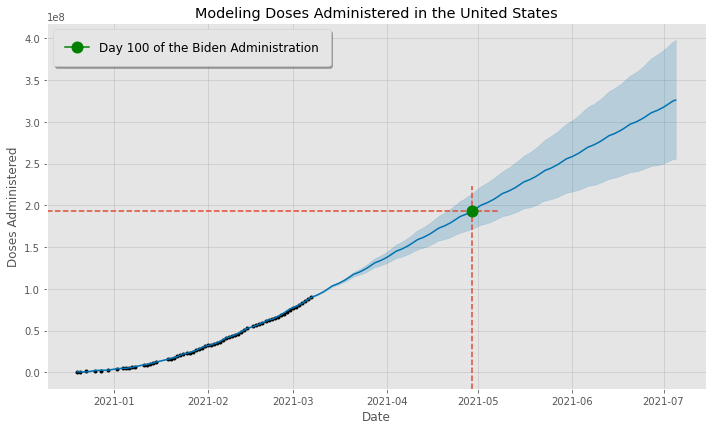

In [283]:
usa_vacc_prophet.plot(usa_vacc_forecast_preds, xlabel = 'Date', ylabel = 'Doses Administered');
plt.title('Modeling Doses Administered in the United States');
plt.axvline(x = datetime.datetime(2021, 4, 29, 3, 6, 29), linestyle = 'dashed', ymax = 0.554202)
plt.axhline(y = 1.936808e+08, linestyle = 'dashed', xmax = 0.685)
plt.plot(datetime.datetime(2021, 4, 29, 3, 6, 29), 1.9385e+08, marker = 'o', markersize = 11, label = 'Day 100 of the Biden Administration', color = 'green')
plt.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1, loc = 'upper left', prop = {'size': 12});

# New Section

The plot shows our forecast of the number of vaccines to be administered from Dec. 2020 to Jan. 2025. The black dots represent our actual data points. The blue line is our predictions. The shaded blue region represents our margin of error for our predictions. 

In [10]:
# # Export model 
# pickle.dump(ca_vacc_prophet, open("/content/drive/MyDrive/HackDavis 2021/final_prophet_model.pkl", 'wb'))

# # To read in the model and use it:
# #loaded_model = pickle.load(open("/content/drive/MyDrive/HackDavis 2021/final_prophet_model.pkl", 'rb'))
# #periods = 365 * 4
# #loaded_model.make_future_dataframe(periods = periods, freq = 'D')

In [11]:
# # Export to csv
# ca_vacc_forecast_preds.to_csv("/content/drive/MyDrive/HackDavis 2021/California Vaccine Predictions (2020 to 2025).csv")